Develop a classification model -Logistic regression model

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
#load, clean the dataset and perform data transformation
df_class_model = pd.read_csv('../data/processed_data/df_delay.csv')

In [19]:
df_class_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17653 entries, 0 to 17652
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        17653 non-null  object 
 1   Time        17653 non-null  object 
 2   Day         17653 non-null  object 
 3   Station     17653 non-null  object 
 4   Code        17653 non-null  object 
 5   Min Delay   17653 non-null  float64
 6   Min Gap     17653 non-null  float64
 7   Bound       17653 non-null  object 
 8   Line        17653 non-null  object 
 9   Month       17653 non-null  int64  
 10  Month Name  17653 non-null  object 
 11  Category    17653 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.6+ MB


In [20]:
 #count isnull values per column
print(df_class_model.isnull().sum())

Date          0
Time          0
Day           0
Station       0
Code          0
Min Delay     0
Min Gap       0
Bound         0
Line          0
Month         0
Month Name    0
Category      0
dtype: int64


In [21]:
df_class_model['Month'] = df_class_model['Month'].astype('object')

In [22]:
#provide concise summary of dataset
df_class_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17653 entries, 0 to 17652
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        17653 non-null  object 
 1   Time        17653 non-null  object 
 2   Day         17653 non-null  object 
 3   Station     17653 non-null  object 
 4   Code        17653 non-null  object 
 5   Min Delay   17653 non-null  float64
 6   Min Gap     17653 non-null  float64
 7   Bound       17653 non-null  object 
 8   Line        17653 non-null  object 
 9   Month       17653 non-null  object 
 10  Month Name  17653 non-null  object 
 11  Category    17653 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.6+ MB


In [23]:
print(df_class_model.head())

         Date   Time     Day                Station   Code  Min Delay  \
0  2024-01-01  00:44  Monday     VAUGHAN MC STATION  MUPAA        0.0   
1  2024-01-01  00:48  Monday          BLOOR STATION    SUO        0.0   
2  2024-01-01  01:10  Monday     VAUGHAN MC STATION    MUO        8.0   
3  2024-01-01  01:11  Monday         DUNDAS STATION    SUO        0.0   
4  2024-01-01  01:38  Monday  ST GEORGE YUS STATION   SUUT        0.0   

   Min Gap Bound Line Month Month Name                           Category  
0      0.0     S   YU     1    January  Door/Passenger/Platform Incidents  
1      0.0     S   YU     1    January                  Security/Policing  
2     14.0     S   YU     1    January                      Miscellaneous  
3      0.0     S   YU     1    January                  Security/Policing  
4      0.0     N   YU     1    January                  Security/Policing  


In [27]:
# Splitting the dataset into training and testing subsets
X = df_class_model.drop(['Date','Min Delay','Station','Code','Time'], axis=1)
y = df_class_model['Min Delay']

In [28]:
X

,Day,Min Gap,Bound,Line,Month,Month Name,Category
0,Monday,0.0,S,YU,1,January,Door/Passenger/Platform Incidents
1,Monday,0.0,S,YU,1,January,Security/Policing
2,Monday,14.0,S,YU,1,January,Miscellaneous
3,Monday,0.0,S,YU,1,January,Security/Policing
4,Monday,0.0,N,YU,1,January,Security/Policing
...,...,...,...,...,...,...,...
17648,Friday,13.0,E,SHP,1,January,Mechanical/Electrical/Vehicle Equipment
17649,Friday,8.0,N,YU,1,January,Door/Passenger/Platform Incidents
17650,Friday,14.0,E,BD,1,January,Security/Policing
17651,Friday,7.0,N,YU,1,January,Medical/Injury/Safety


Model Pipeline  and model training using Logistic Regression model

Create a model pipeline - steps to perform:
* Split the dataset into training and testing subsets 
* Defining transformations for numeric features
* Defining transformations for categorical features
* Add a step labelled 'preprocessor' and assign the ColumnTransformer from the previous section.
* Import the Logistic Regression model from scikit-learn
* Initialize the Logistic Regression model with a random state for reproducibility
* Calculate the accuracy of the model on the test dataset
* Visualize the importance of the model features

In [29]:

# Splitting the dataset into training and testing subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features =['Min Gap']
categorical_features = ['Bound','Line','Category','Day','Month']

# Defining transformations for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Defining transformations for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combining preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features), 
        ('cat', categorical_transformer, categorical_features)]) 


X_train = preprocessor.fit_transform(X_train) 
X_test = preprocessor.transform(X_test)

In [30]:
# Importing the Logistic Regression model from scikit-learn
from sklearn.linear_model import LogisticRegression
import joblib

# Initializing the Logistic Regression model with a random state for reproducibility
model = LogisticRegression(random_state=42)

# Training (fitting) the Logistic Regression model using the processed training data
model.fit(X_train, y_train)

#saving the trained model  as preprocessor as a serialized files using joblib
joblib.dump(model, 'ttc_delay_logistic_regression_model.joblib')
joblib.dump(preprocessor, 'ttc_delay_preprocessor.joblib')

# Calculating the accuracy of the model on the test dataset
accuracy = model.score(X_test, y_test)
print(accuracy)
 

0.6120079297649391


c:\Users\User\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


According to results based on testing model the model correctly classified approximately as 61.20% of the instances in the test set.

 Visualize the importance of the model features


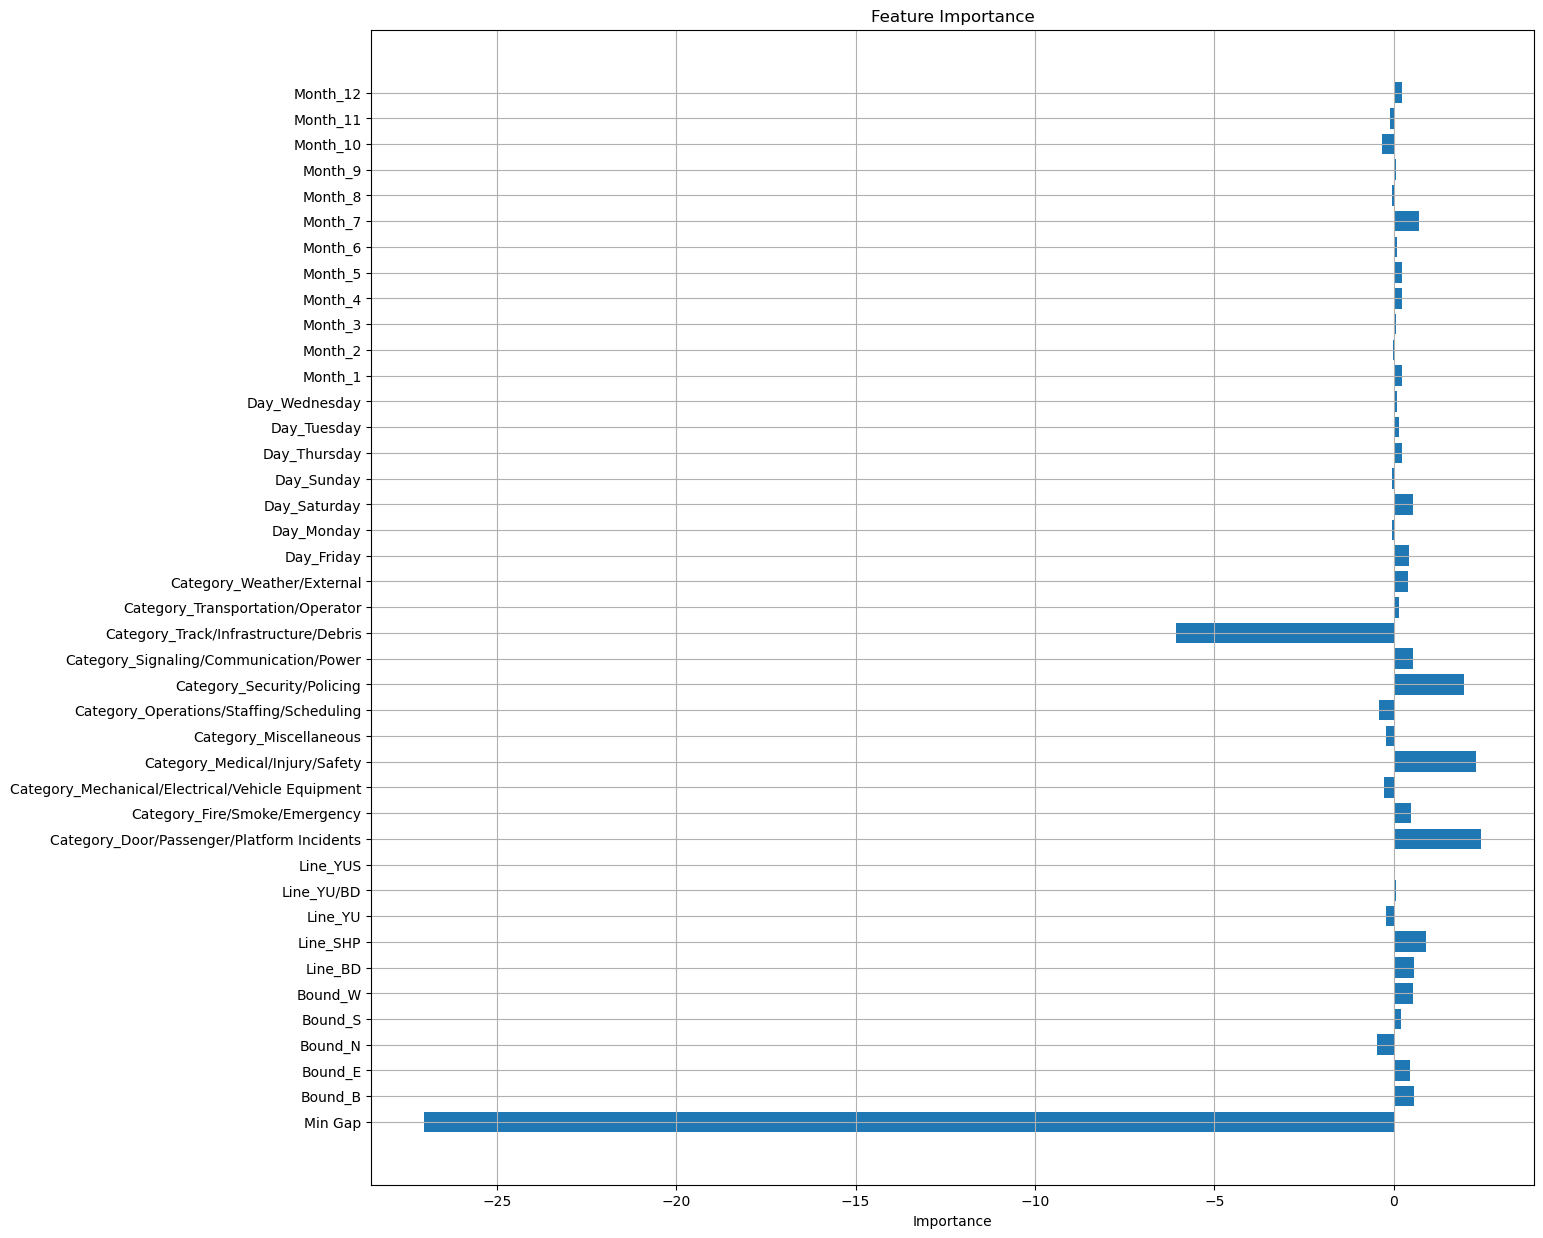

In [26]:
# visualize the importance of the model features 
import matplotlib.pyplot as plt
import numpy as np

importance = model.coef_[0]
features = np.array(numeric_features + list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)))

plt.figure(figsize=(15, 15))
plt.barh(features, importance)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.grid(True)
plt.show()


The analysis of feature importance from the model highlights several key factors that significantly contribute to TTC delays. Each of these factors is discussed below to provide insights into their influence:
 - Min Gap
 - Bound
 - Line
 - Category of incident
 - Day if the week
 - Month 
 

* Min Gap: The "Min Gap" feature reflects the interval between consecutive trains. A smaller or irregular gap can lead to congestion on the line, increasing the likelihood of delays. This variable’s high importance suggests that maintaining consistent train intervals is critical for mitigating delays and ensuring smooth operations.

* The Cagetgories having the max impact of TTS dealay are:
- Doors/Passengers/Platform Incidents
- Medical Injuries/Safety
- Safety/Policing
- Infracstructure/Debries
The delays realted to those categories causing service interruptions during the process

* Line 'SHP' (Sheppard) - identified as the most impacted by delays. This could be attributed to the line's operational characteristics, such as fewer trains or limited infrastructure capacity, making it more sensitive to disruptions.

* Day of the Week - Saturday: The model identified Saturdays as a key day for increased delays. This trend may be attributed to higher maintenance works done during weekends, coupled with a reduced service schedule, making the system more susceptible to disruptions.

* Month - July: The month of July stands out as a period with heightened delays. This could be due to seasonal factors, such as increased tourism or special events, which elevate passenger volumes. Additionally, weather conditions such as summer storms may impact service reliability during this time.

Conclusion:
The findings underscore the multifaceted nature of TTC delays, influenced by operational, behavioral, and temporal factors. To address these issues, targeted strategies such as improving passenger education, optimizing train schedules, and enhancing track and platform maintenance can be implemented. Recognizing the prominence of specific days and months in contributing to delays also enables more efficient allocation of resources to manage anticipated disruptions.